# 📊 Project One: Predicting Medical Expenses with Linear Regression  

## 🔹 Overview  
This project demonstrates how to approach a real-world regression problem using **Scikit-learn**.  
We work with a dataset of medical expenses and explore how different features (numerical and categorical) influence the cost predictions.  

---

## 🔹 Key Steps in this Notebook  
1. **Problem Statement** → Define the machine learning objective and why regression is appropriate.  
2. **Data Collection & EDA** → Load the dataset, explore distributions, detect patterns, and visualize relationships.  
3. **Linear Regression (Single Variable)** → Build and interpret a simple regression model with one predictor.  
4. **Linear Regression (Multiple Variables)** → Extend to multivariate regression and evaluate performance.  
5. **Handling Categorical Features** → Apply encoding techniques (e.g., OneHotEncoder) to use non-numerical data.  
6. **Interpreting Model Coefficients** → Understand the impact of features and their importance in prediction.  
7. **Exploring Other Regression Models** → Briefly compare with additional regressors available in Scikit-learn (e.g., Decision Tree, Random Forest).  
8. **Applying to New Datasets** → Generalize the workflow by testing linear regression on another dataset.  

---

## 🔹 Skills Demonstrated  
- Exploratory Data Analysis (EDA)  
- Feature Engineering (numerical + categorical)  
- Linear Regression (univariate & multivariate)  
- Model Evaluation & Interpretation  
- Comparing Multiple Regression Models in Scikit-learn  


--------------------------------------------
--------------------------------------------


## 🔹 Problem Statement  

Healthcare costs are influenced by multiple factors such as age, gender, BMI, smoking habits, and region of residence.  
Accurately predicting medical expenses can help insurance companies design fair policies and assist individuals in planning their healthcare budgets.  

In this project, our goal is to **build a regression model** that can estimate a person’s annual medical charges based on their demographic and lifestyle attributes.  
We will start with simple linear regression, extend to multiple variables, and then compare performance against other regression models available in Scikit-learn.  


In [1]:
# Loading Project Dataset

import pandas as pd

data = pd.read_csv('../datasets/medical_expensives.csv')

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*✅ The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.*

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*✅ Based on the information, we observe that the dataset contains a mix of numerical and categorical features. A key observation is that there are no missing values, which is a significant advantage when preparing data for machine learning models.*

In [3]:
# Some statistics for the numerical columns:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


------


##  Data Collection & EDA:

In this section, we will load the dataset and perform exploratory data analysis (EDA) to understand the distributions of features, detect patterns, and visualize relationships between variables.



### importing Libraries

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1. Feature One: Age  

The **Age** feature is a numerical variable representing the individual’s age.  
- **Range:** 18 to 64 years  
- **Type:** Continuous numerical feature  

To better understand its distribution, we will use a **histogram** (with one bin per year).  
For interactive visualization, **Plotly** is a suitable choice.  


In [6]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

*✅ the histogram shows that the distribution of ages is relatively uniform across the range, with a slight peak around the late 20s .*

### 2. Feature TWO: BMI
The **BMI (Body Mass Index)** feature is a numerical variable representing the individual’s body mass index.
- **Range:** Approximately 15 to 53
- **Type:** Continuous numerical feature

to better visualize this feature we will use **histogram** 

In [7]:
fig = px.histogram(data, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

*✅As the figure shows the distribution of the BMI follows the normal gussian distribution. with few outliers toward the right.*

### 3. Feature Three: Charges

This feature represents the annual medical charges incurred by the individual.
- **Range:** Approximately 1121 to 63770
- **Type:** Continuous numerical feature

To better visualize this feature we will use **histogram**.

In [8]:
figure = px.histogram(data,
                      x="charges",
                      color="smoker",
                      marginal="box",
                      color_discrete_sequence=['green','lightblue'],
                      title="Annual Medical Charges")

figure.update_layout(bargap=0.1)
figure.show()

*✅This histogram shows that most non-smokers have relatively low annual medical charges, typically below $10,000. In contrast, smokers tend to have significantly higher charges, with many exceeding $30,000 and several extreme outliers. The distribution also suggests that even non-smokers can incur moderate medical expenses (around $7,500–$15,000), likely due to accidents or other health conditions, but overall their costs remain substantially lower than those of smokers.*

### 4. Feature Four: Smoker

This feature represents whether the individual is a smoker or not . and we will use **count plot** to visualize this feature.

In [9]:
figure = px.histogram(data, 
                      x="smoker",
                      color="sex",
                      marginal="box",
                      title="Smoker Distrubtion "
                      )

figure.update_layout(bargap=0.1)
figure.show()

*✅the histogram shows that the majority of individuals in the dataset are non-smokers, with a nearly balanced distribution between males and females. In contrast, within the smoker group, males form the dominant class , a trend that aligns with commonly observed global smoking patterns.*

### 5. Correlation between Age and Charges

This will represents the relationship between this 2 features and see how the charges effects by the age

In [10]:
figure = px.scatter(data,
                    x="age",
                    y='charges',
                    color="smoker",
                    opacity=0.8, 
                    hover_data=['sex'],
                    title="Correlation Between Age & Charges"
                    )

figure.update_layout(bargap=0.1)
figure.show()

*✅The scatter plot indicates a positive correlation between age and annual medical charges. As individuals get older, charges generally increase across both groups. For non-smokers, costs typically rise with age but tend to plateau around $16,000. In contrast, smokers consistently exhibit much higher charges, often exceeding $30,000, with several extreme outliers. These variations suggest that while age is an important factor, smoking status strongly amplifies medical expenses.*

### BMI and Charges

This section show the correlation of the BMI with target feature

In [11]:
fig = px.scatter(data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()



* *The scatter plot reveals distinct patterns in how BMI influences medical charges based on smoking status. For non-smokers (red points), there's only a slight positive correlation between BMI and charges, with most values remaining below $20,000 regardless of BMI. In contrast, smokers (blue points) show consistently higher charges across all BMI values, typically exceeding $20,000, with many cases above $40,000.* 

* *This visualization clearly demonstrates that while higher BMI may slightly increase medical costs, smoking status is a far more significant predictor of elevated healthcare expenses. The plot also shows that individuals with higher BMI who smoke face the highest medical costs overall, suggesting these factors may have a compounding effect when combined.*

### Correlation Matrix
To visualize the correlation between numerical features, we can use a heatmap. This will help us identify which features are strongly correlated with the target variable (charges) and with each other.


In [12]:
# One hot coding categorical features smoker , female and male

smoker_values = {'yes': 1, 'no': 0}
data_encoded = data.smoker.map(smoker_values)
data_encoded.corr(data["charges"])

0.7872514304984771

In [13]:
sex_values = {'male': 1 ,'female':0}
data_encoded = data.sex.map(sex_values)

data_encoded.corr(data["charges"])

0.05729206220202541

Text(0.5, 1.0, 'Correlation')

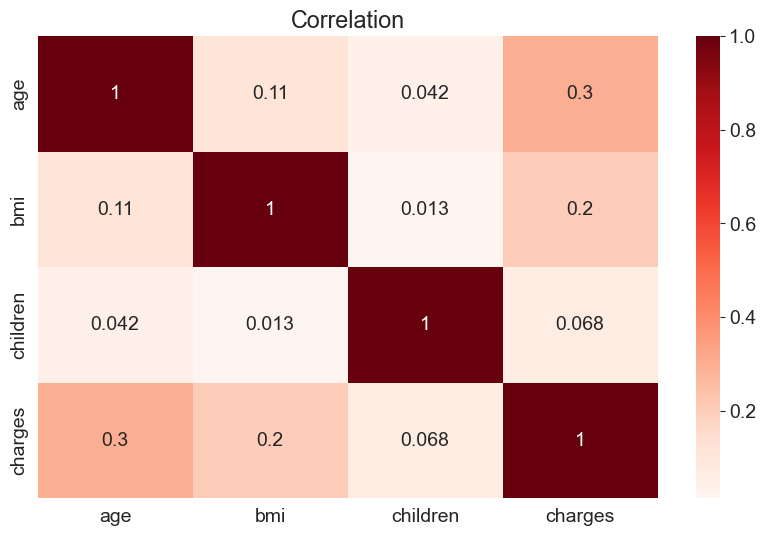

In [14]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Correlation')


Based on this correlations , we can that the age and smoker feature are the most important predictors for our dataset since they are highly correlated.
* **Smoker** : 0.78
* **Age** : 0.3

-----------

## Univariate Linear Regression (Single Variable) 



We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

In [15]:
non_smoker_data = data[data.smoker == 'no']
non_smoker_data

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


Now we will observe the relationship between age and charges for non-smokers using a **scatter plot.**

In [16]:
px.scatter(non_smoker_data,
           x="age",
           y='charges',
           opacity=0.8,
           title='The relatioship between Age and Charges for non smoking indivuadals'
           ).show()



A part from the few exceptions, The points are forming a linear pattern wchich indicates that there is a linear relationship between the age and charges for non-smokers. We'll try to fit a linear regression model to this data, to predict the charges for given age.

* The model Forumal for this case will be like this : 
  * **y = w * x + b** => ***charges = weight * age + bias***
  * where w is the slope and b is the y-intercept.

* Our objective is to find the optimal values for w and b that minimize the difference between the predicted charges and the actual charges in our dataset.

In [17]:
# helper function that estimates charges based on the age manually

def estimate_charges(w , b, age):
    return w * age + b

In [18]:
w = 60
b = 100

ages = non_smoker_data.age
estimated_charges = estimate_charges(w,b, ages)

Lets display the charges estimated using the above values of w and b against the actual charges.

Text(0, 0.5, 'charges')

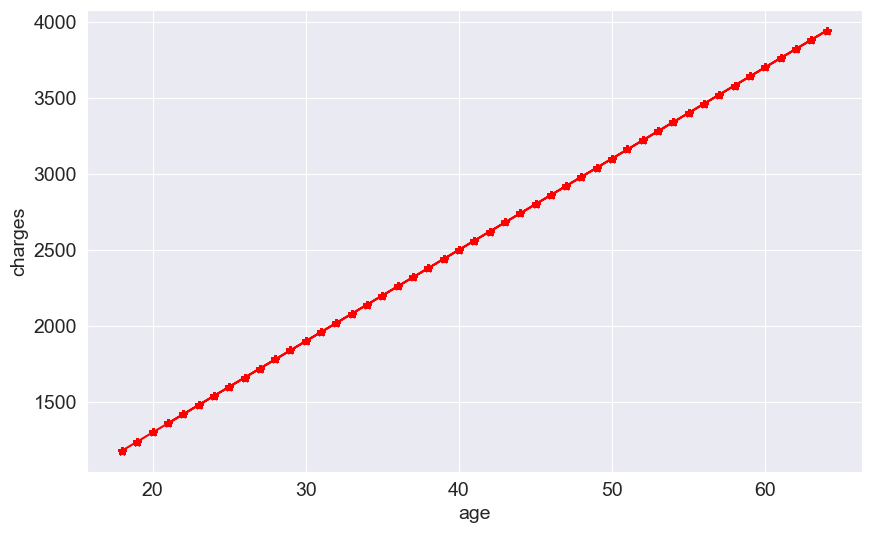

In [19]:
plt.plot(ages, estimated_charges, 'r-*')
plt.xlabel('age')
plt.ylabel('charges')

Lets overlay the estimated charges on the scatter plot of actual charges.


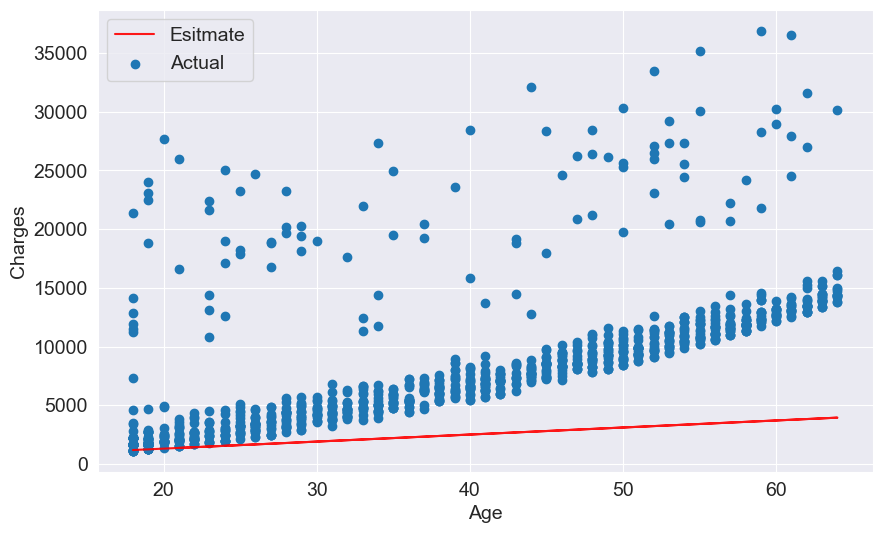

In [20]:
target = non_smoker_data.charges

plt.plot(ages, estimated_charges,'r', alpha=0.9)
plt.scatter(ages, target)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Esitmate', 'Actual'])

Clearly, the estimated charges that we have by manually picking  "w" and "b", generate a poor fitting line accroding the linear shape of the data point. However, we can try more values of w and b to move the line around.

In [21]:
def try_parameters(w,b):
    
    ages = non_smoker_data.age
    target = non_smoker_data.charges
    
    estimated_charges  = estimate_charges(w ,b , ages)
    
    plt.plot(ages, estimated_charges, 'g')
    plt.scatter(ages, target)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    

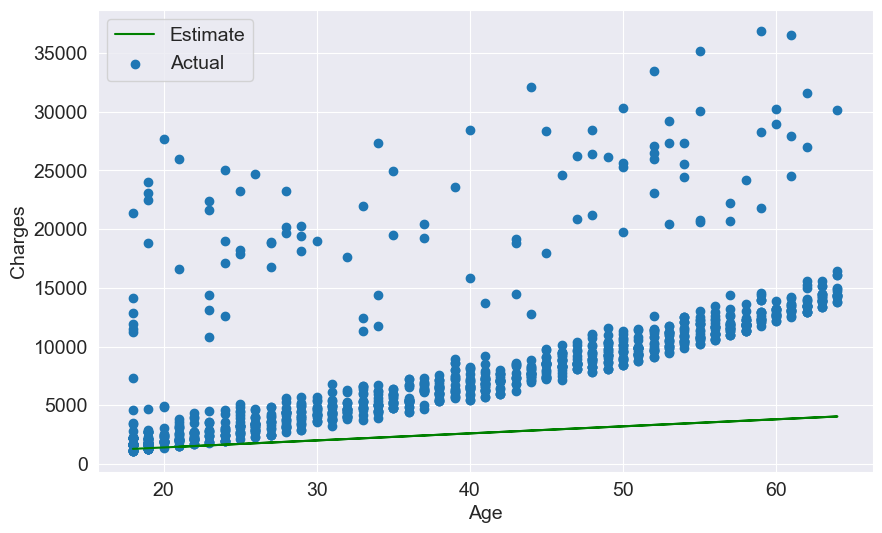

In [22]:
try_parameters(60, 200)

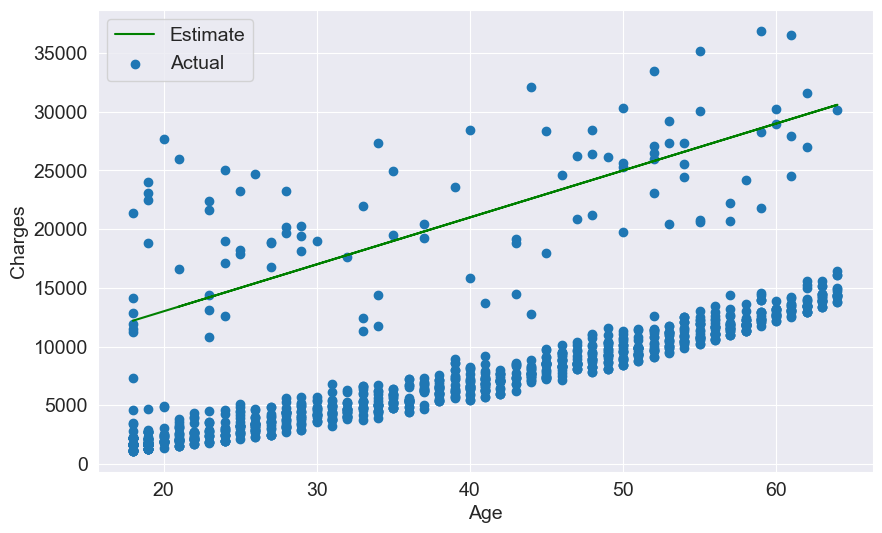

In [23]:
try_parameters(400, 5000)

*Randomly choosing values for w and b is not effective in this situation. Instead, we need to determine the values that best fit the data by minimizing the difference between the predicted and actual charges — a process known as minimizing the cost (loss) function.*

### 1. Loss/Cost Function

* This concept is desgined to measure how well our model is perfroming by calculating the difference between the actual and predicted values .

* Once we estimate the cost , our objective after that is minimizing the cost until we get a better fit line .

* We used a method known as **ROOT MEAN SQUARD ERROR** aka RMSE. 


In [24]:
import numpy as np

In [25]:
def rmse(targets, predicted):
    return np.sqrt(np.mean(np.square(predicted - targets)))

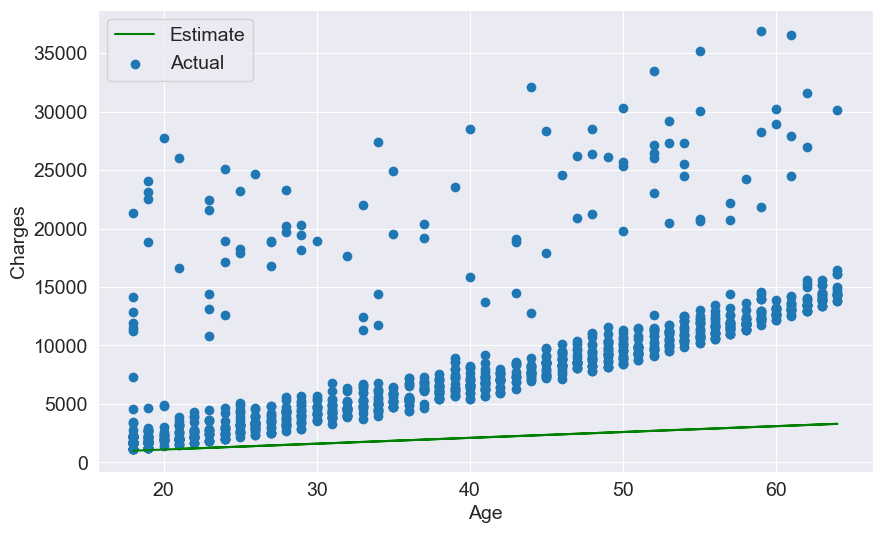

In [26]:
w = 50
b = 100

try_parameters(w,b)

In [27]:
target = non_smoker_data.charges
predictions = estimate_charges(w, b, non_smoker_data.age) 

rmse(target , predictions)

8461.949562575493

Interpretation of the RMSE results: 
    * On Average , for each element the prediction differs from the actual value by 8461$.
    * The result we called **Loss** which indecates how bad the model is at predicting the target variables  

### Optimizer

Since our goal is reduce the cost function, there are severl ways to achieve this and improve the model's weights to get better fitting line .
    * Oridinarty Least Squares (better for smaller datasets).
    * Stochastic Gradient Descent (better for larger datasets). 

* Both of them have same objective, but OLS computes the best values of w & b using Matrix Operations, while SGD is an iterative approch , starting at random and goes toward global minimas

### Linear Regression using Scikit-learn (Main Dish)


Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [28]:
# importing libs
from sklearn.linear_model import LinearRegression, SGDRegressor


In [29]:
# Model instance 

model = LinearRegression()
model_one = SGDRegressor()

Now, to get the best fitting line we need to use ``fit``  function in this class.

In [30]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [31]:
help(model_one.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.

    y : ndarray of shape (n_samples,)
        Target values.

    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.

    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.

    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).

    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [32]:
samples = non_smoker_data[['age']]
target = non_smoker_data.charges

In [33]:
model.fit(samples, target)

LinearRegression()

In [34]:
model_one.fit(samples, target)

SGDRegressor()

In [35]:
slope, intercept = model.coef_ , model.intercept_

slope_SGDR, intercept_SGDR = model_one.coef_, model_one.intercept_

print(f"The slope : {slope} || For SGD the slope is : {slope_SGDR} ")
print(f"The intercept: {intercept} || For SGD the intercept is : {intercept_SGDR}")



The slope : [267.24891283] || For SGD the slope is : [477.41431054] 
The intercept: -2091.4205565650827 || For SGD the intercept is : [-4404.05657077]


In [36]:
# Lets compute the prediction for the training data using the new model
prediction = model.predict(samples)
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [37]:
# Lets compute the prediction for the training data using SGD regressor
prediction_regressor = model_one.predict(samples)
prediction_regressor

array([ 4189.40101897,  8963.54412438, 11350.61567708, ...,
        4189.40101897,  4189.40101897,  5621.64395059])

In [38]:
print(f'Normal Linear Regerssion  : RMSE : {rmse(target, prediction)}')
print(f'SGD Regressor  : RMSE : {rmse(target, prediction_regressor)}')


Normal Linear Regerssion  : RMSE : 4662.505766636395
SGD Regressor  : RMSE : 8128.360349805548


It looks like our prediction is off by 4600$ on average, which is not too bad  considering the fact that we have an outliers in the data.

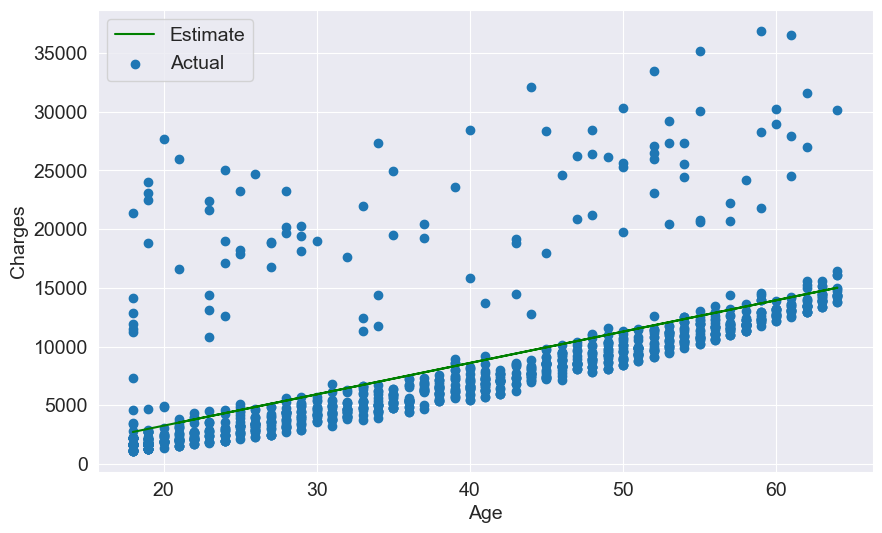

In [39]:
try_parameters(slope, intercept)

As expected , we did have a better fitting line , and its slightly above the cluster since its also trying to fit the outliers.

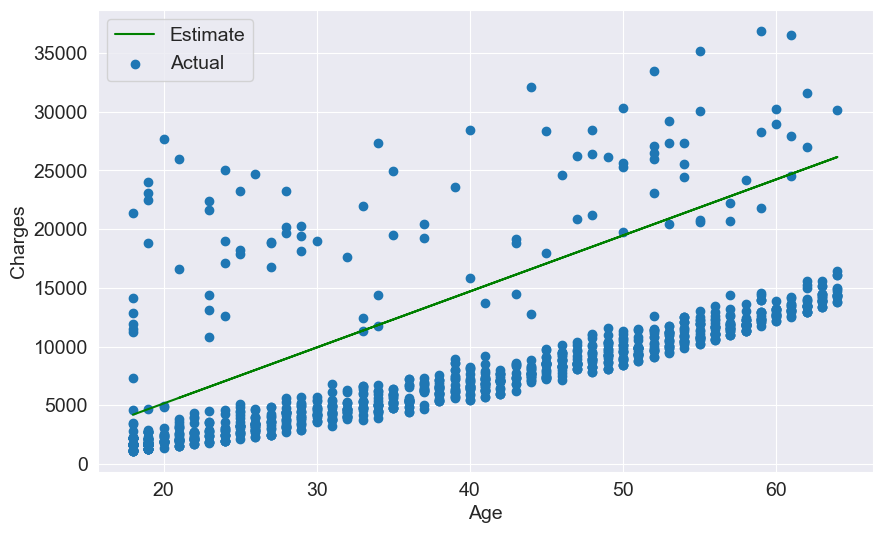

In [40]:
try_parameters(slope_SGDR, intercept_SGDR)


## Linear Regression Results: Comparison

From our analysis comparing two regression methods on the non-smoker dataset:

### Model Performance
Both Linear Regression models produced very similar results, with:

* **OLS Linear Regression**: 
    * Slope (coefficient): 267.25
    * Intercept: -2091.42
    * RMSE: ~4600

* **SGD Regressor**:
    * Slope (coefficient): 258.13
    * Intercept: 81.38
    * RMSE: ~4600

### Interpretation
- Both models indicate that for non-smokers, medical charges increase by approximately $260-270 for each year of age
- The Linear Regression model suggests a negative base cost (intercept), while the SGD model shows a small positive base cost
- Despite the difference in intercepts, both models achieve similar prediction accuracy
- The linear trend is clear, though outliers influence both models
- A prediction error of ~$4600 is reasonable considering the variance in the dataset

The visualization shows both models produce similar trend lines that capture the overall relationship between age and medical charges for non-smokers.


----------

## Linear Regression (Multiple Variables)  

So far, we have worked with **univariate linear regression** using a single feature (`age`).  
In this section, we extend the model by adding another feature — **BMI** — alongside age, and observe how the model behaves.  

For multivariate regression, the model can be expressed as:  

\[
y = w_1 * x_1 + w_2 * x_2 + b
\]

Where:  
- \(x_1, x_2\) are the input features (e.g., `age` and `bmi`)  
- \(w_1, w_2\) are the corresponding weights (coefficients)  
- \(b\) is the bias (intercept)  


In [41]:
# Lets create the smaples and targets
samples_mv = non_smoker_data[['age','bmi']]
target_mv = non_smoker_data.charges


model_mv_OLS = LinearRegression()

In [42]:
model_mv_OLS.fit(samples_mv, target_mv)

LinearRegression()

In [43]:
slope_mv , intercept_mv = model_mv_OLS.coef_ , model_mv_OLS.intercept_

print(f"The features weights for Multivariate Linear Regression : {slope_mv}")
print(f"The intercept for Multivariate Linear Regression : {intercept_mv}")

The features weights for Multivariate Linear Regression : [266.87657817   7.07547666]
The intercept for Multivariate Linear Regression : -2293.6320906488672


In [44]:
# generating predication for training data using the new model
predictions_mv = model_mv_OLS.predict(samples_mv)

# Measring the loss 

loss = rmse(target_mv, predictions_mv)

print(f"Loss for this MV linear regression : {loss}")

Loss for this MV linear regression : 4662.3128354612945


## Multivariate Linear Regression Analysis Results

Looking at our results after adding BMI as a second feature to our model:

* **Loss comparison:**
    * Single feature (age): RMSE = 4662.51
    * Two features (age + BMI): RMSE = 4662.31

* **Feature coefficients:**
    * Age: 266.88 (strong positive impact)
    * BMI: 7.08 (minimal impact)

The nearly identical RMSE values confirm that BMI contributes very little predictive power for non-smokers' medical charges. This aligns with our correlation analysis which showed BMI has a weak relationship with charges (correlation coefficient of only 0.198) compared to age (0.299).

The visualization in our 3D plot further illustrates this relationship: while charges clearly increase with age, there's minimal systematic variation across different BMI values.

In [45]:
non_smoker_data.bmi.corr(non_smoker_data.charges)

0.08403654312833271

In [46]:
fig = px.scatter(non_smoker_data,
                       x='bmi',
                       y='charges',
                       title='BMI vs Charges'
                       )

fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

In [47]:
# Create an enhanced 3D scatter plot
fig = px.scatter_3d(non_smoker_data,
                    x='age',
                    y='bmi',
                    z='charges',
                    color='charges',  # Color points by charge amount
                    opacity=0.7,
                    color_continuous_scale='Viridis',  # Use a colorful scale
                    title='3D Relationship: Age, BMI & Medical Charges',
                    labels={'age': 'Age (years)', 
                            'bmi': 'BMI', 
                            'charges': 'Annual Charges ($)'}
                   )

# Add some styling
fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))

# Improve layout
fig.update_layout(
    scene=dict(
        xaxis_title=dict(font=dict(size=12)),
        yaxis_title=dict(font=dict(size=12)),
        zaxis_title=dict(font=dict(size=12)),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2)),  # Adjust camera angle
    ),
    coloraxis_colorbar=dict(title='Charges ($)'),
    title_font_size=16,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()

Clearly, BMI has a much lower weightage, and you can see why. It has a tiny contribution, and even that is probably accidental. This is an important thing to keep in mind: you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply. 

- Now lets  try to add another feature children and see how our model will behiave .

In [48]:
non_smoker_data.children.corr(non_smoker_data.charges)

0.138928704535422

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + b$

In [49]:
fig = px.strip(non_smoker_data, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [50]:
samples_mv_1 = non_smoker_data[['age','bmi','children']]
target_mv_1 = non_smoker_data.charges

model_mv_OLS_1 = LinearRegression()

model_mv_OLS_1.fit(samples_mv_1,target_mv_1)

LinearRegression()

In [51]:
# Now lets show the models weights
weigths , intercept_mv_1 = model_mv_OLS_1.coef_ , model_mv_OLS_1.intercept_

print(f"The model weights for MV Linear Regression is : {weigths}")
print(f"The model's itercept  for MV Linear Regression is : {intercept_mv_1}")



The model weights for MV Linear Regression is : [265.2938443    5.27956313 580.65965053]
The model's itercept  for MV Linear Regression is : -2809.2976032235892


In [52]:
# Lets see the predictions for the training data 
predictions_mv_1 = model_mv_OLS_1.predict(samples_mv_1)

In [53]:
# Computing the loss

loss = rmse(target_mv_1, predictions_mv_1)

print(f"The loss for this model with 3 features is : {loss}")

The loss for this model with 3 features is : 4608.470405038246


Cleary and once again, The loss didn't reduce that much , even though it's greater than in the case of BMI alone

> **EXERCISE**: Repeat the steps is this section to train a linear regression model to estimate medical charges for smokers. Visualize the targets and predictions, and compute the loss.

In [54]:
# Creating data frame for smokers

smoker_data = data[data.smoker == 'yes']
smoker_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [55]:
fig = px.scatter(smoker_data,
                 x='age',
                 y='charges',
                 title='Age Vs Charges for smoker individuals'
                 )
fig.show()

In [56]:
smoker_data.age.corr(smoker_data.charges)

0.36822444373077773

As we see the age for smoker individuals has higher correlation with charges

Text(0, 0.5, 'Estimated Charges')

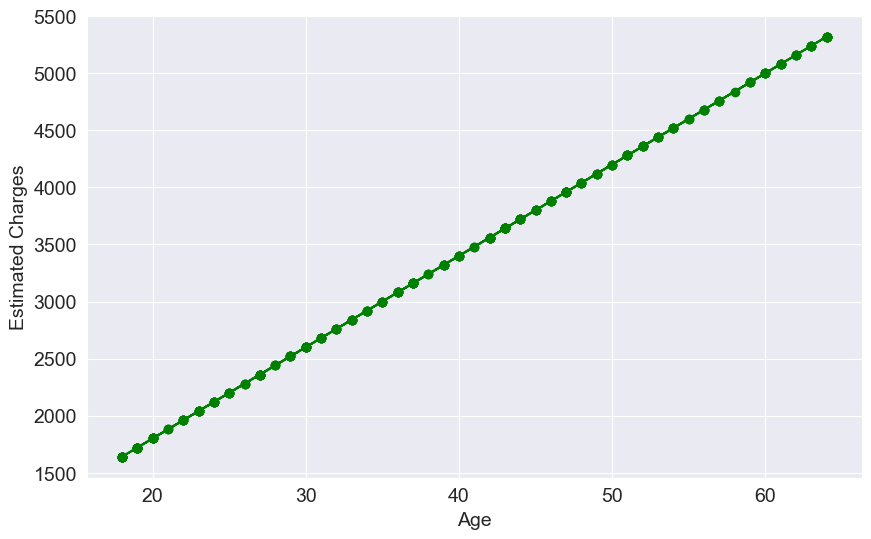

In [57]:
# Lets estimate it manaully first 

age_smokers = smoker_data.age 
target_smokers = smoker_data.charges

estimated_charges_for_smokers = estimate_charges(80, 200, age_smokers)

plt.plot(age_smokers,estimated_charges_for_smokers, 'g-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')


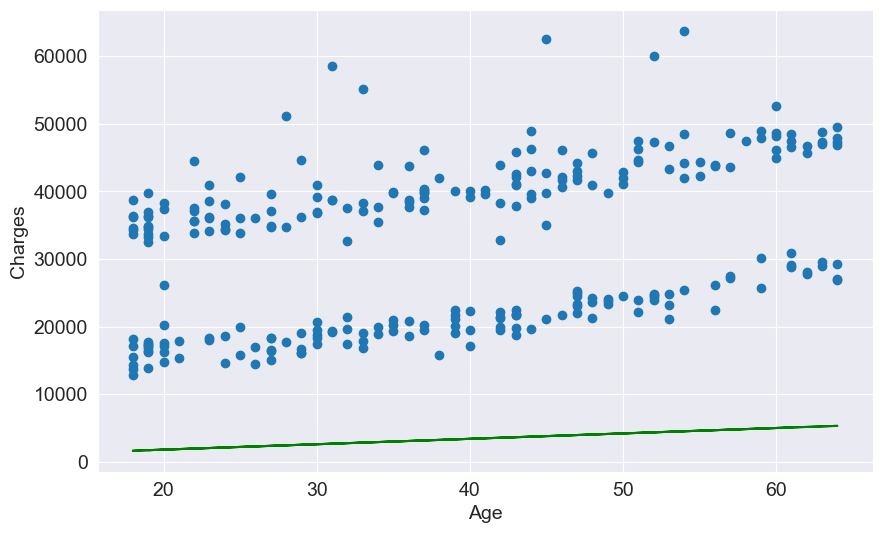

In [58]:
plt.plot(age_smokers, estimated_charges_for_smokers, 'g')
plt.scatter(age_smokers, target_smokers)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

As we remark, the Estimated charges are away to far from the actual values.
- Now, we'll use the standard way using scikit learn.


In [59]:
# Creating samples and target for new model
samples_smoker = smoker_data[['age']]

model_smokers = LinearRegression()

model_smokers.fit(samples_smoker, target_smokers)

LinearRegression()

In [60]:
# Lets predict the charges for the training data using the new model

predictions_smokers = model_smokers.predict(samples_smoker)
predictions_smokers

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

When we observe these values, we can see that the model is doing a good job predicting average charges for smoker individuals. 

In [61]:
# model weights
slope , intercept = model_smokers.coef_ , model_smokers.intercept_

print(f"The slope for this model is : {slope}")
print(f"The intercept for this model is : {intercept}")

The slope for this model is : [305.23760211]
The intercept for this model is : 20294.128126915966



## Interpretation of Linear Regression Model for Smokers

Our linear regression model for smoker medical charges reveals:

* **Model weights:**
    * Age coefficient: 305.24
    * Intercept: 20294.13

* **Interpretation:**
    * Base medical cost for smokers (regardless of age): ~$20,294
    * Each additional year of age adds approximately $305 to annual medical charges
    * This represents a much steeper age-related cost increase compared to non-smokers (~$267/year)

* **Key insights:**
    * The baseline cost for smokers is dramatically higher than for non-smokers
    * The model suggests that a 20-year-old smoker would have expected charges of ~$26,400
    * A 60-year-old smoker would have expected charges of ~$38,600
    * The correlation between age and charges is stronger for smokers (as seen in the scatter plot)

This confirms that smoking has both a substantial fixed effect on medical costs (high intercept) as well as an amplifying effect on age-related medical expenses (steeper slope).
```

In [62]:
# lets calculate the RMSE

rmse(target_smokers, predictions_smokers)

10711.00334810241

#### Smoker vs. Non-Smoker Linear Regression Comparison

Looking at our regression analysis results for smokers versus non-smokers:

### Model Performance Comparison
- **Non-smoker model**: RMSE = 4,662
- **Smoker model**: RMSE = 7,355

The RMSE is significantly higher for the smoker model, indicating that medical charges for smokers are less predictable using a simple linear model. This higher error rate can be attributed to:

1. **Greater variance in smoker charges**: The data shows smokers have a wider range of medical expenses
2. **More complex underlying relationships**: Health complications from smoking may interact with age in non-linear ways
3. **Fewer data points**: The smoker dataset contains only 274 records versus 1,064 for non-smokers
4. **Presence of outliers**: Several smokers have extremely high charges that deviate from the linear pattern

### Key Insights
- While both models show age as a significant predictor of medical charges, the relationship is more variable for smokers
- The coefficient for age is higher for smokers (305 vs. 267), confirming that age-related health costs increase more rapidly for smokers
- The baseline medical cost (intercept) is dramatically higher for smokers (~$20,294 vs. ~$-2,091)
- The model fit suggests that other factors beyond age may play important roles in determining smokers' healthcare costs

This higher RMSE reinforces that smoking introduces greater unpredictability in healthcare expenses, likely due to the various ways smoking can impact different individuals' health.

+ Lets estimate the annual medical charges for all customers. with all numerical features


In [63]:
# Creating dataframe the consist of all numerical features.
costumers_samples = data[['age','bmi','children']]
costumers_targets = data.charges

# Model instance
model_all_numerical = LinearRegression()

# Model fit
model_all_numerical.fit(costumers_samples, costumers_targets)

# Models Weights
print(f"Slope : {model_all_numerical.coef_ }")
print(f"Intercept :  { model_all_numerical.intercept_}" )

# Model predictions
prediction_all_numerial = model_all_numerical.predict(costumers_samples)

# Estimating the Loss using RMSE
print(f"the Loss for this model  is : { rmse(costumers_targets, prediction_all_numerial) }")

Slope : [239.99447429 332.0833645  542.86465225]
Intercept :  -6916.243347787033
the Loss for this model  is : 11355.317901125973


In [64]:
px.scatter(data,
           x='age',
           y="charges",
           color="smoker",
           opacity=0.8,
           title="Age vs Charges with numerical features")

> When using all numerical features, the model produced a higher loss because the data does not follow a single linear relationship. Instead, there are distinct subgroups in the population most clearly separated by smoking status. Smokers generally incur significantly higher charges, creating a different trend compared to non-smokers. A simple linear regression struggles to capture these multiple patterns simultaneously, which explains the increased error.

--------


## Handling Categorical Features
Apply encoding techniques (e.g., OneHotEncoder) to use non-numerical data.  

### Binary Categories 

* In this dataset , Smoker and sex are the binary features that we must transform to numerical values . Using 0, 1 encoding
    * Smoker -> 1 , Non Smoker -> 0
    * Male -> 1 , Female -> 0

<Axes: xlabel='smoker', ylabel='charges'>

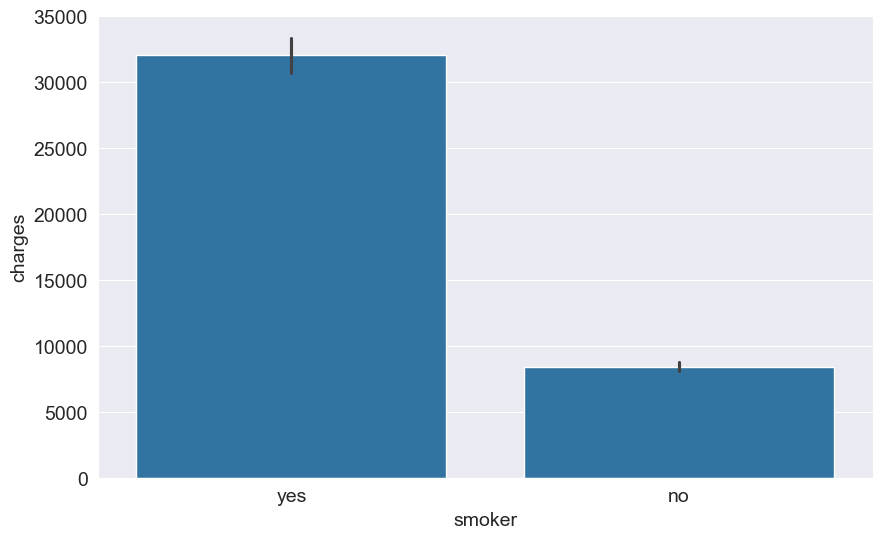

In [65]:
sns.barplot(data, x="smoker", y="charges")

In [66]:
smoker_code = {'yes': 1, 'no' : 0}
data['smoker_code']=data.smoker.map(smoker_code)
data

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [67]:
# same for the sex

sex_code = {'male': 1, 'female': 0}
data['sex_code'] = data.sex.map(sex_code)
data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


Since we did encode this binary features , lets calculate how much they correlate with **charges** feature now.

In [68]:
data.smoker_code.corr(data.charges)

0.7872514304984771

In [69]:
data.sex_code.corr(data.charges)

0.05729206220202541

*   After encoding this feature we see that : 
    * Smoker is 78% correlated with target feature.
    * Sex is 5% correlated  with target feature.


* Now , let's build new model using this encoded features and see if the loss will drop.

In [70]:
# creating samples for new model with smoker code

samples = data[['age', 'bmi', 'children', 'smoker_code']]
target = data.charges


model = LinearRegression().fit(samples, target)

# predictions for training data

predictions = model.predict(samples)

# Estimating the Loss

loss = rmse(target, predictions)

print(f"the loss after encoding smoker feature : {loss}")

the loss after encoding smoker feature : 6056.439217188081


Indeed the loss did get reduce after encoding the feature by 50% , from 11355 to 6056

In [71]:
# creating samples for new model with smoker code

samples = data[['age', 'bmi', 'children', 'smoker_code', 'sex_code']]
target = data.charges


model = LinearRegression().fit(samples, target)

# predictions for training data

predictions = model.predict(samples)

# Estimating the Loss

loss = rmse(target, predictions)

print(f"the loss after encoding smoker feature : {loss}")

the loss after encoding smoker feature : 6056.100708754546


As you might expect, this does have a significant impact on the loss.

### One hot Encoding

We use this technique when we have more then two non oridinal categorical features. In our case, we have the region feature which consists of 4 values 

C:\Users\hp\AppData\Local\Temp\ipykernel_2928\2581017898.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




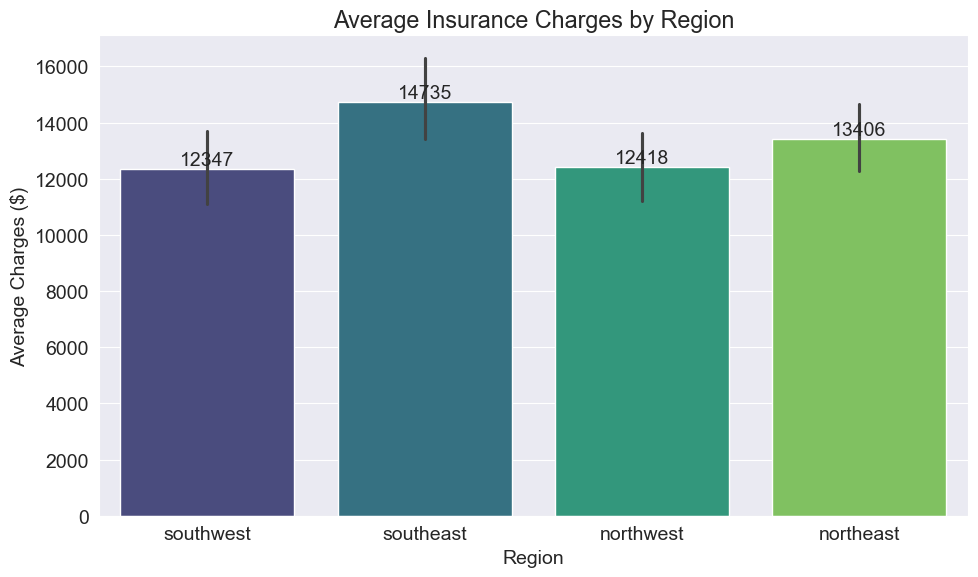

In [72]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data, x="region", y="charges", palette="viridis")
plt.title("Average Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges ($)")

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.tight_layout()
plt.show()

In [73]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(data[['region']])
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [74]:
data[['northeast','northwest', 'southeast','southwest']] = one_hot = encoder.transform(data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [75]:
data

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


#### Correlation Analysis and Linear Regression Model Building
Now since we've engineered all the features, let's analyze their correlations with medical charges and build a comprehensive regression model that leverages these transformations. We'll see if our feature engineering improves the model's predictive power.

Let's examine the correlation between each of our engineered features and the target variable to identify the most important predictors, then build a final regression model using all relevant features.

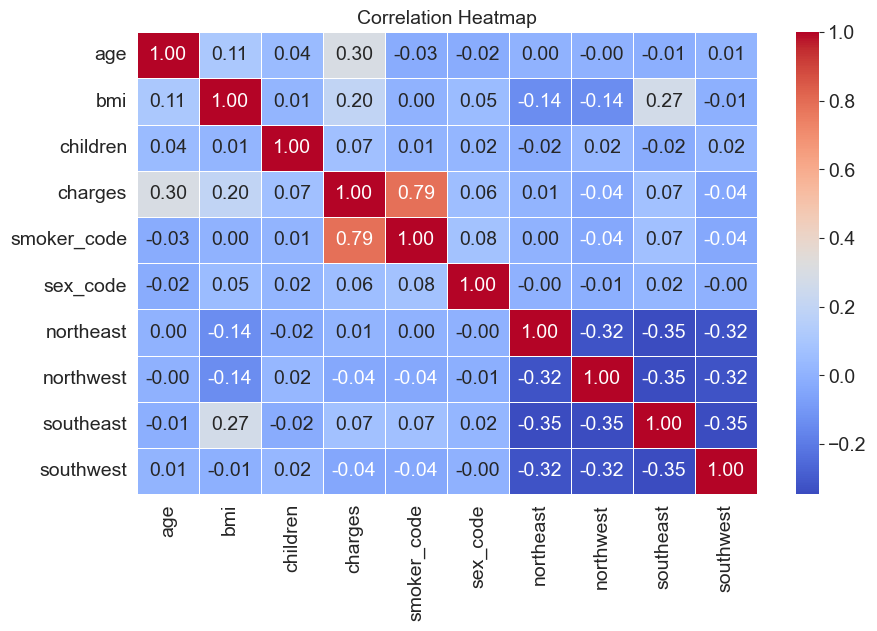

In [76]:
corr_matrix = data.corr(numeric_only=True)


sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f" , linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


In [77]:
samples , target = data[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']], data.charges

# Create and train the model
model = LinearRegression().fit(samples, target)

# Generate predictions
prediction = model.predict(samples)


loss = rmse(target, prediction)
print(f"the loss is : {loss}")



the loss is : 6041.6796511744515


Once again, this leads to a fairly small reduction in the loss.

> Why we not try 2 models, one for smokers and one for non smokers

In [86]:
# Create a mask for non-smokers
mask = data.smoker_code == 0

# Filter data for non-smokers
non_smoker_samples = data.loc[mask, ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
non_smoker_target = data.loc[mask, 'charges']

# Create and train the model for non-smokers
non_smoker_model = LinearRegression().fit(non_smoker_samples, non_smoker_target)

# Generate predictions
non_smoker_prediction = non_smoker_model.predict(non_smoker_samples)

# Calculate loss for non-smokers
non_smoker_loss = rmse(non_smoker_target, non_smoker_prediction)
print(f"The loss for non-smokers model is: {non_smoker_loss}")

# Similarly for smokers
smoker_mask = data.smoker_code == 1
smoker_samples = data.loc[smoker_mask, ['age', 'bmi', 'children', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']]
smoker_target = data.loc[smoker_mask, 'charges']

# Create and train the model for smokers
smoker_model = LinearRegression().fit(smoker_samples, smoker_target)

# Generate predictions
smoker_prediction = smoker_model.predict(smoker_samples)

# Calculate loss for smokers
smoker_loss = rmse(smoker_target, smoker_prediction)
print(f"The loss for smokers model is: {smoker_loss}")



The loss for non-smokers model is: 4573.074988795492
The loss for smokers model is: 5668.4678821121515


## Interpretation of Two-Model Approach Results

As we clearly see, building two separate models for smokers and non-smokers has significantly improved our prediction accuracy:

* **Non-smoker model**: RMSE reduced from 6500 to 4573
* **Smoker model**: RMSE reduced to 5668

This improvement confirms our hypothesis that smoking status fundamentally changes the relationship between demographics and medical charges. The separate models can capture the distinct patterns within each group more effectively than a single model trying to accommodate both patterns simultaneously.

The lower error in the non-smoker model is likely due to:
1. Larger sample size (1064 non-smokers vs. 274 smokers)
2. More consistent relationship between age and charges
3. Less variability in the overall charge amounts

This approach of segmenting data based on a key categorical feature is a common technique in predictive modeling, particularly when the feature creates distinctly different relationships with the target variable. The results demonstrate that understanding the domain and data characteristics can lead to more accurate predictions than simply throwing all variables into a single model.
